In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
import keras
import os
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
%matplotlib inline

In [23]:
# CNN based model in keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 54, 54, 64)       

In [28]:
# Training our dataset on the model

train_datagen = image.ImageDataGenerator(
     rescale = 1./255,
     shear_range = 0.2,
     zoom_range = 0.2,
     horizontal_flip = True
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [29]:
train_generator = train_datagen.flow_from_directory(
     'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 300 images belonging to 2 classes.


In [30]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [31]:
validation_generator = test_dataset.flow_from_directory(
    'CovidDataset/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 101 images belonging to 2 classes.


In [34]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=10,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2,
)

Epoch 1/10
10/10 [==============================] - 52s 5s/step - loss: 0.1915 - accuracy: 0.9400 - val_loss: 0.1541 - val_accuracy: 0.9844
Epoch 2/10
10/10 [==============================] - 51s 5s/step - loss: 0.1827 - accuracy: 0.9200 - val_loss: 8.0809e-04 - val_accuracy: 0.9459
Epoch 3/10
10/10 [==============================] - 53s 5s/step - loss: 0.1548 - accuracy: 0.9367 - val_loss: 0.1429 - val_accuracy: 0.9844
Epoch 4/10
10/10 [==============================] - 52s 5s/step - loss: 0.1424 - accuracy: 0.9300 - val_loss: 0.0770 - val_accuracy: 0.9189
Epoch 5/10
10/10 [==============================] - 55s 5s/step - loss: 0.1433 - accuracy: 0.9300 - val_loss: 0.0045 - val_accuracy: 0.9688
Epoch 6/10
10/10 [==============================] - 52s 5s/step - loss: 0.1767 - accuracy: 0.9267 - val_loss: 9.6089e-04 - val_accuracy: 0.9730
Epoch 7/10
10/10 [==============================] - 54s 5s/step - loss: 0.1624 - accuracy: 0.9333 - val_loss: 0.0775 - val_accuracy: 0.9844
Epoch 8/10
1

In [35]:
model.save("model_covid.h5")

In [36]:
model.evaluate_generator(train_generator)

[0.11141723394393921, 0.9700000286102295]

In [37]:
model.evaluate_generator(validation_generator)

[0.03356224298477173, 0.9702970385551453]

In [46]:
model = load_model("model_covid.h5")
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [62]:
y_actual = []
y_test = []

In [63]:
for i in os.listdir("./CovidDataset/Test/Normal"):
    img = image.load_img("./CovidDataset/Test/Normal/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

In [64]:
for i in os.listdir("./CovidDataset/Test/Covid"):
    img = image.load_img("./CovidDataset/Test/Covid/"+i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [65]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [69]:
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
CR = classification_report(y_actual,y_test)
CR

'              precision    recall  f1-score   support\n\n           0       0.93      0.98      0.95        51\n           1       0.98      0.92      0.95        50\n\n    accuracy                           0.95       101\n   macro avg       0.95      0.95      0.95       101\nweighted avg       0.95      0.95      0.95       101\n'

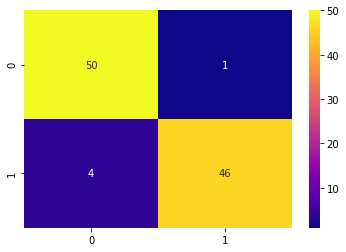

In [68]:
CM = confusion_matrix(y_actual,y_test)
sns.heatmap(CM, cmap='plasma', annot = True)